# U.S. Medical Insurance Costs

The goal of this project is to analyze various attributes within **insurance.csv** to learn more about the patient information in the file and gain insight into potential use cases for the dataset.

The analysis consists of the following objectives:

1. Range age groups from the dominant to the rare.  
    - Determine the gender proportion in general and by age groups.
    - Find the age of the youngest representatives and the oldest.
2. Find out if bmi correlates with:
    - age or gender;
    - with smoking;
    - with at least one child.
3. Find out how the price of insurance changes depending on:
    - smoking;
    - the presence of children;
    - bmi;
    - age.
4. Range regional groups from the dominant to the rare.  
5. Find out if there are regions where there are statistically more:
    - people who smoke;
    - people who have more than 1 child.


To implement these objectives one should import and read the insurance.csv, and put it in a list for further usage.

In [170]:
import csv

users_list = []
with open('insurance.csv', newline = '') as users_csv:
    user_reader = csv.DictReader(users_csv)
    for user in user_reader:
        user['age'] = int(user['age']) 
        user['bmi'] = float(user['bmi'])
        user['children'] = int(user['children'])
        user['charges'] = float(user['charges'])
        user['smoker'] = user['smoker'] == 'yes'
        users_list.append(user)


### 1. Range age groups from the dominant to the rare 

#### Steps:

1.1. Create generalized age groups:
* 18 - 25;
* 26 - 30;
* 31 - 45;
* 46 - 60;
* 61 - 75;
* 76 and older.


In [171]:
age_groups = {
    '18-25': {
        'male': 0,
        'female': 0,
        'total': 0
    },
    '26-30': {
        'male': 0,
        'female': 0,
        'total': 0
    },    
    '31-45': {
        'male': 0,
        'female': 0,
        'total': 0
    }, 
    '46-60': {
        'male': 0,
        'female': 0,
        'total': 0
    }, 
    '61-75': {
        'male': 0,
        'female': 0,
        'total': 0
    }, 
    '76 +': {
        'male': 0,
        'female': 0,
        'total': 0
    } 
}

1.2. Put representatives' data points in corresponding age groups and determine gender proportion in each of the age groups.

In [172]:

for user in users_list:
    age = user['age']
    sex = user['sex']
    if age >= 18 and age <= 25:
        age_groups['18-25']['total'] += 1
        age_groups['18-25'][sex] += 1
    elif age >= 26 and age <= 30:
        age_groups['26-30']['total'] += 1
        age_groups['26-30'][sex] += 1
    elif age >= 31 and age <= 45:
        age_groups['31-45']['total'] += 1
        age_groups['31-45'][sex] += 1
    elif age >= 46 and age <= 60:
        age_groups['46-60']['total'] += 1
        age_groups['46-60'][sex] += 1
    elif age >= 61 and age <= 75:
        age_groups['61-75']['total'] += 1
        age_groups['61-75'][sex] += 1
    elif age >= 76:
        age_groups['76 +']['total'] += 1
        age_groups['76 +'][sex] += 1
age_groups

{'18-25': {'male': 159, 'female': 147, 'total': 306},
 '26-30': {'male': 71, 'female': 67, 'total': 138},
 '31-45': {'male': 199, 'female': 195, 'total': 394},
 '46-60': {'male': 203, 'female': 206, 'total': 409},
 '61-75': {'male': 44, 'female': 47, 'total': 91},
 '76 +': {'male': 0, 'female': 0, 'total': 0}}

1.3. Сonvert gender distribution to percentages.

In [173]:
def percentage_calc(part, whole):
    if whole == 0:
        return 0
    percentage = round(100 * part/whole)
    return percentage

def age_groups_in_percents(list):
    age_groups_in_perc = {
        '18-25': {
            'male': 0,
            'female': 0,
            'diff': 0
        },
        '26-30': {
            'male': 0,
            'female': 0,
            'diff': 0
        },    
        '31-45': {
            'male': 0,
            'female': 0,
            'diff': 0
        }, 
        '46-60': {
            'male': 0,
            'female': 0,
            'diff': 0    
        }, 
        '61-75': {
            'male': 0,
            'female': 0,
            'diff': 0
        }, 
        '76 +': {
            'male': 0,
            'female': 0,
            'diff': 0
        } 
    }
    for key, value in age_groups.items():
        age_groups_in_perc[key]['male'] = percentage_calc(value['male'], value['total'])
        age_groups_in_perc[key]['female'] = percentage_calc(value['female'], value['total'])
        age_groups_in_perc[key]['diff'] = abs(age_groups_in_perc[key]['male'] - age_groups_in_perc[key]['female'])
    return age_groups_in_perc




age_groups_in_percents(age_groups)

{'18-25': {'male': 52, 'female': 48, 'diff': 4},
 '26-30': {'male': 51, 'female': 49, 'diff': 2},
 '31-45': {'male': 51, 'female': 49, 'diff': 2},
 '46-60': {'male': 50, 'female': 50, 'diff': 0},
 '61-75': {'male': 48, 'female': 52, 'diff': 4},
 '76 +': {'male': 0, 'female': 0, 'diff': 0}}

1.4. Determine general gender proportion in numbers and percentages. 

In [174]:
total_n_males = 0
total_n_females = 0
for value in age_groups.values():
    total_n_males += value['male']
for value in age_groups.values():
    total_n_females += value['female']

total_n_users = total_n_females + total_n_males

print(percentage_calc(total_n_males, total_n_users))
print(percentage_calc(total_n_females, total_n_users))

51
49



1.4. Show gender and age distribution on a graph.


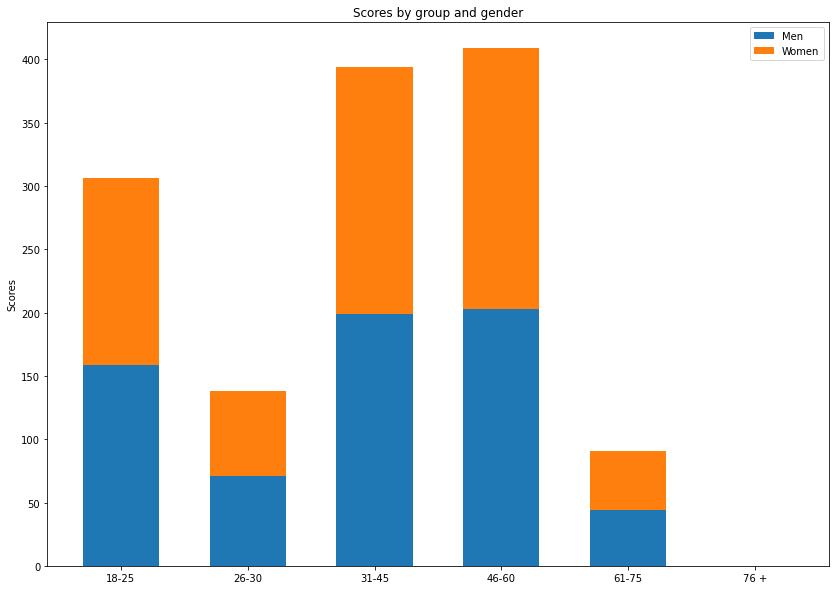

In [175]:
import matplotlib.pyplot as plt

labels = age_groups.keys()
men_ages = [value['male'] for value in age_groups.values()]
women_ages = [value['female'] for value in age_groups.values()]
width = 0.60       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(14, 10))

ax.bar(labels, men_ages, width, label='Men')
ax.bar(labels, women_ages, width, bottom=men_ages,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()


1.5. Find the age of the youngest representatives and the oldest.

In [176]:
ages_list = [user['age'] for user in users_list]
youngest = min(ages_list)
oldest = max(ages_list)
youngest, oldest

print(age_groups)
age_groups_in_percents(age_groups)


{'18-25': {'male': 159, 'female': 147, 'total': 306}, '26-30': {'male': 71, 'female': 67, 'total': 138}, '31-45': {'male': 199, 'female': 195, 'total': 394}, '46-60': {'male': 203, 'female': 206, 'total': 409}, '61-75': {'male': 44, 'female': 47, 'total': 91}, '76 +': {'male': 0, 'female': 0, 'total': 0}}


{'18-25': {'male': 52, 'female': 48, 'diff': 4},
 '26-30': {'male': 51, 'female': 49, 'diff': 2},
 '31-45': {'male': 51, 'female': 49, 'diff': 2},
 '46-60': {'male': 50, 'female': 50, 'diff': 0},
 '61-75': {'male': 48, 'female': 52, 'diff': 4},
 '76 +': {'male': 0, 'female': 0, 'diff': 0}}

#### Conclusion: 
- 2 age groups from `31 to 45` and from `46 to 60` are the most represented, they contain `394` and `409` people, respectively. Among the group aged `31 to 45` 2% more males, in the second group genders are represented equally.
- Next is the youth from `18 to 25` with the number of people `306`.
- Least of all people presented in the age groups from `61 to 75` and from `26 to 31` — `91` and `138` people.
- There are no people over `75` years. 
- The youngest representatives are `18` years old.
- The oldest are `64`.